In [11]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.optimize import curve_fit
import glob
from scipy.integrate import trapz

In [12]:
#### DELETE AZIMUTH FILE sun0_-6 -- WILL CAUSES ERRORS IF NOT DELETED ####

az_files = glob.glob("sun_azimuth/sun*") 
az_files.sort() 
print(az_files)
print('\n')
el_files = glob.glob("sun_elevation/sun*")
el_files.sort()
print(el_files)

## m = minus p = plus

['sun_azimuth/sun-1_0.dat', 'sun_azimuth/sun-2_0.dat', 'sun_azimuth/sun-3_0.dat', 'sun_azimuth/sun-4_0.dat', 'sun_azimuth/sun-5_0.dat', 'sun_azimuth/sun-6_0.dat', 'sun_azimuth/sun-7_0.dat', 'sun_azimuth/sun-8_0.dat', 'sun_azimuth/sun-9_0.dat', 'sun_azimuth/sun0_0.dat', 'sun_azimuth/sun10_0.dat', 'sun_azimuth/sun1_0.dat', 'sun_azimuth/sun2_0.dat', 'sun_azimuth/sun3_0.dat', 'sun_azimuth/sun4_0.dat', 'sun_azimuth/sun5_0.dat', 'sun_azimuth/sun6_0.dat', 'sun_azimuth/sun7_0.dat', 'sun_azimuth/sun8_0.dat', 'sun_azimuth/sun9_0.dat']


['sun_elevation/sun_el_m1', 'sun_elevation/sun_el_m2', 'sun_elevation/sun_el_m3', 'sun_elevation/sun_el_m4', 'sun_elevation/sun_el_m5', 'sun_elevation/sun_el_p1', 'sun_elevation/sun_el_p10', 'sun_elevation/sun_el_p2', 'sun_elevation/sun_el_p3', 'sun_elevation/sun_el_p4', 'sun_elevation/sun_el_p5', 'sun_elevation/sun_el_p6', 'sun_elevation/sun_el_p7', 'sun_elevation/sun_el_p8', 'sun_elevation/sun_el_p9']


In [13]:
#Azimuth

az_spectra_initial = []

for az_file in az_files: 
    with open(az_file) as az_data: 
        spectrum_rows = []    
        for j, row in enumerate(az_data, start=1):
            if j%4 == 0: 
                spectrum_rows.append(row) 
        tot_spectrum = np.zeros(1024)
        for row in spectrum_rows: 
            temp_spec = row.split(' ') 
            spec = [] 
            for val in temp_spec: 
                if val != '' and val != '\n':
                    spec.append(val)           
            tot_spectrum = tot_spectrum + np.float64(spec) 
        az_spectra_initial.append(tot_spectrum/len(spectrum_rows)) ### divison to average
        
az_spectra_initial = np.asarray(az_spectra_initial)
#Elevation

el_spectra_initial = [] 

for el_file in el_files: 
    with open(el_file) as el_data: 
        spectrum_rows = []    
        for j, row in enumerate(el_data, start=1): 
            if j%4 == 0: 
                spectrum_rows.append(row)         
        tot_spectrum = np.zeros(1024) 
        for row in spectrum_rows: 
            temp_spec = row.split(' ') 
            spec = []
            for val in temp_spec: 
                if val != '' and val != '\n':
                    spec.append(val)                   
            tot_spectrum = (tot_spectrum + np.float64(spec))
        el_spectra_initial.append(tot_spectrum/len(spectrum_rows)) ### divison to average

el_spectra_initial = np.asarray(el_spectra_initial)

In [14]:
fstart = 1416 
fstop = 1426  
spacing = 0.009766
truncindex = 22 #determined by trial and error
xinitial = np.arange(fstart,fstop,step=spacing)
x = xinitial[truncindex:]

##remove spike at 1416
el_spectra = el_spectra_initial[:,truncindex:]
az_spectra = az_spectra_initial[:,truncindex:]

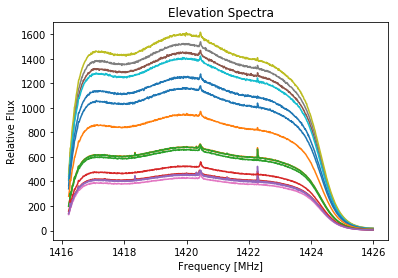

In [15]:
for i in range(0,len(el_files)):
    plt.plot(x,el_spectra[i])
plt.title('Elevation Spectra')
plt.xlabel('Frequency [MHz]')
plt.ylabel('Relative Flux')
plt.show()

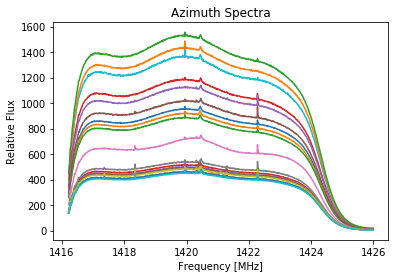

5.68440322581


In [16]:
for i in range(0,len(az_files)):
    plt.plot(x,az_spectra[i])
plt.title('Azimuth Spectra')
plt.xlabel('Frequency [MHz]')
plt.ylabel('Relative Flux')
plt.show()

print(np.min(az_spectra))

In [17]:
elintegral = np.zeros(len(el_files))
azintegral = np.zeros(len(az_files))

elintegral = trapz(el_spectra,x)
azintegral = trapz(az_spectra,x)

#angle values in degrees, sorted in same order as the files
elevation = np.asarray([-1,-2,-3,-4,-5,1,10,2,3,4,5,6,7,8,9])
azimuth = np.asarray([-1,-2,-3,-4,-5,-6,-7,-8,-9,0,10,1,2,3,4,5,6,7,8,9])

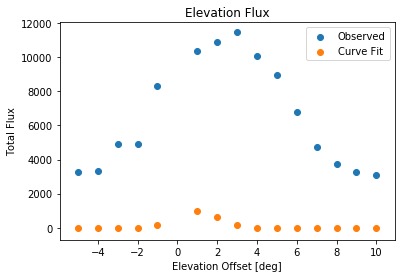

a=1000, b=1, c=1


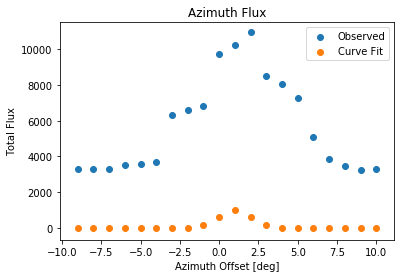

a=1000, b=1, c=1


In [18]:
def elfunc (x,a,b,c):
    return a*np.exp(-(x-b)**2/(2*c**2))

a0,b0,c0 = (1000,1,1)

plt.scatter(elevation,elintegral,label='Observed')
plt.scatter(elevation,elfunc(elevation,a0,b0,c0),label='Curve Fit')
plt.title('Elevation Flux')
plt.xlabel('Elevation Offset [deg]')
plt.ylabel('Total Flux')
plt.legend()
plt.show()

print ("a=%s, b=%s, c=%s" % (a0,b0,c0))

def azfunc (x,d,e,f):
    return d*np.exp(-(x-e)**2/(2*f**2))

d0,e0,f0 = (1000,1,1)

plt.scatter(azimuth,azintegral,label='Observed')
plt.scatter(azimuth,azfunc(azimuth,d0,e0,f0),label='Curve Fit')
plt.title('Azimuth Flux')
plt.xlabel('Azimuth Offset [deg]')
plt.ylabel('Total Flux')
plt.legend()
plt.show()

print ("a=%s, b=%s, c=%s" % (d0,e0,f0))

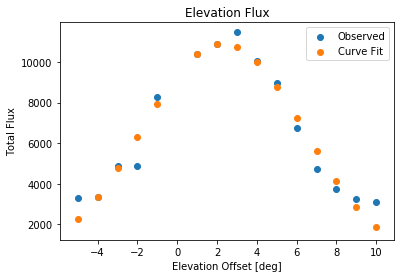

a=10912.1389126, b=2.28469549354, c=4.09904792621


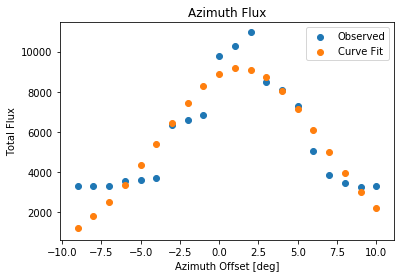

a=9181.87687358, b=1.32325806433, c=5.15607082728


In [19]:
elcoeffs, elfiterr = curve_fit(elfunc, elevation, elintegral, p0=(a0,c0,b0))

plt.scatter(elevation,elintegral,label='Observed')
plt.scatter(elevation,elfunc(elevation,*elcoeffs),label='Curve Fit')
plt.title('Elevation Flux')
plt.xlabel('Elevation Offset [deg]')
plt.ylabel('Total Flux')
plt.legend()
plt.show()

print ("a=%s, b=%s, c=%s" % (elcoeffs[0], elcoeffs[1], elcoeffs[2]))

azcoeffs, azfiterr = curve_fit(azfunc, azimuth, azintegral, p0=(d0,e0,f0))

plt.scatter(azimuth,azintegral,label='Observed')
plt.scatter(azimuth,azfunc(azimuth,*azcoeffs),label='Curve Fit')
plt.title('Azimuth Flux')
plt.xlabel('Azimuth Offset [deg]')
plt.ylabel('Total Flux')
plt.legend()
plt.show()

print ("a=%s, b=%s, c=%s" % (azcoeffs[0], azcoeffs[1], azcoeffs[2]))

In [20]:
elsigma = elcoeffs[2]
azsigma = azcoeffs[2]

elFWHM = 2.35482 * elsigma
azFWHM = 2.35482 * azsigma

print('The FWHM of the elevation curve is',elFWHM,'degrees')
print('The FWHM of the azimuth curve is',azFWHM,'degrees')

The FWHM of the elevation curve is 9.65252003759 degrees
The FWHM of the azimuth curve is 12.1416187055 degrees


In [23]:
f = 1420.4e6 #Hz
c = 3e8 #m/s
w = c/f
D = 2.1 #m
convert = 180/np.pi
diff = 1.22 * w/D * convert
print('The wavelength is',w,'meters')
print('The diffraction limit is:',diff,'degrees')

The wavelength is 0.21120811039143902 meters
The diffraction limit is: 7.030298407486867 degrees
